# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

## Initialization

The pandas, numpy, stats, pyplot, and seaborn libraries were loaded to utilize in the analysis. Import warnings to prevent filter warnings from appearing in the output.

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


## Load data

Using try-except constructions to avoid errors during data importing, the 5 relevant dataframes for calls, internet, messages, plans, and users of Megaline were imported in.

In [2]:
# Load the data files into different DataFrames
try:
    calls = pd.read_csv('/datasets/megaline_calls.csv')
except:
    calls = pd.read_csv('megaline_calls.csv')
    
try:
    internet = pd.read_csv('/datasets/megaline_internet.csv')
except:
    internet = pd.read_csv('megaline_internet.csv')
    
try:
    messages = pd.read_csv('/datasets/megaline_messages.csv')
except:
    messages = pd.read_csv('megaline_messages.csv')

try:
    plans = pd.read_csv('/datasets/megaline_plans.csv')
except:
    plans = pd.read_csv('megaline_plans.csv')
    
try:
    users = pd.read_csv('/datasets/megaline_users.csv')
except:
    users = pd.read_csv('megaline_users.csv')


## Prepare the data

Below, each of the dataframes will be explored, fixed, and enriched as necessary for the subsequent analysis.

## Plans

In [3]:
# Print the general/summary information about the 'plans' DataFrame
plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Print a sample of data for 'plans'
display(plans)


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


The "plans" dataframe contains information about Megaline's Surf and Ultimate plans. It includes the pricing schemes that will be relevant later in the analysis when calculating the the costs for each plan for users.

There is no missing data in this dataframe based on the provided descriptions of each plan and no other discrepancies that must be fixed so nothing will be changed for this dataframe.

## Users

In [5]:
# Print the general/summary information about the 'users' DataFrame
users.info()
users.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [6]:
# Print a sample of data for 'users'
display(users.head(20))


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


In [7]:
# Check to ensure that there are no duplicated users in the dataframe
users.duplicated().sum()


0

The 'users' dataframe includes information about each of the 500 users selected for the purpose of this analysis. The only two columns that will need to be changed in terms of data type are the 'reg_date' and 'churn_date' columns which are currently object data types. They will instead be changed to the datetime type below for more functionality and consistency.

As for the missing values, it appears as though the 'churn_date' column is the only one with missing values, 466 to be exact. However, these missing values do not need to be filled as data in this column is only appropriate in the case that the user stopped using services. If the value is missing, the calling plan was being used when this database was extracted.

### Fix Data

In [8]:
# Change the 'reg_date' column to datetime data type
users['reg_date'] = pd.to_datetime(users['reg_date'])
display(users['reg_date'].head(10))


0   2018-12-24
1   2018-08-13
2   2018-10-21
3   2018-01-28
4   2018-05-23
5   2018-11-29
6   2018-11-27
7   2018-07-11
8   2018-08-03
9   2018-04-22
Name: reg_date, dtype: datetime64[ns]

In [9]:
# Change the 'churn_date' column to datetime data type
users['churn_date'] = pd.to_datetime(users['churn_date'], errors = 'ignore')
display(users['churn_date'].head(10))


0          NaT
1          NaT
2          NaT
3          NaT
4          NaT
5          NaT
6   2018-12-18
7          NaT
8          NaT
9          NaT
Name: churn_date, dtype: datetime64[ns]

## Calls

In [10]:
# Print the general/summary information about the 'calls' DataFrame
calls.info()
calls.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [11]:
# Print a sample of data for 'calls'
display(calls.head(20))


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


In [12]:
# Check how many of the calls had a duration of 0 seconds
(calls[calls['duration'] == 0].count())/calls.shape[0]


id           0.194823
user_id      0.194823
call_date    0.194823
duration     0.194823
dtype: float64

The 'calls' dataframe contains info on all the calls that were made by users. The only column that would benefit from a data type change is the 'call_date' column which is currently an object type versus a datetime type. It will be changed below to datetime.

Although the dataframe does not contain any missing data, it should be noted that about 19% of the calls turned out to be 0 minutes in duration which indicates that though a call was placed, it likely did not go through. Since calls are only billed when they are over 1 second in duration, the rows in which the 'duration' column has a value of 0 should be dropped for the analysis. Also, since seconds are rounded up to minutes in all cases of 'duration' greater than 0 seconds, all remaining 'duration' values will be rounded up for ease of analysis.

Finally, in order to make it easier to examine costs for each per monthly pay period, a column that contains just the month of service for each call will be generated to further enrich the data.

### Fix data

In [13]:
# Change the 'call_date' column to datetime data type
calls['call_date'] = pd.to_datetime(calls['call_date'], errors = 'ignore')
display(calls['call_date'].head(10))


0   2018-12-27
1   2018-12-27
2   2018-12-27
3   2018-12-28
4   2018-12-30
5   2018-12-31
6   2018-12-27
7   2018-12-28
8   2018-12-28
9   2018-12-26
Name: call_date, dtype: datetime64[ns]

In [14]:
# Keep only rows with more than 0 seconds in the 'duration' column
calls = calls[calls['duration'] > 0]
calls[calls['duration'] == 0].count()


id           0
user_id      0
call_date    0
duration     0
dtype: int64

In [15]:
# Round up all the 'duration' values to the nearest minute
calls['duration'] = np.ceil(calls['duration']).astype(int)
display(calls['duration'].head())


0     9
1    14
2    15
3     6
4     5
Name: duration, dtype: int64

### Enrich data

In [16]:
# Create a new column for the months in which each call was placed
calls['month'] = pd.DatetimeIndex(calls['call_date']).month
display(calls['month'].head())


0    12
1    12
2    12
3    12
4    12
Name: month, dtype: int64

## Messages

In [17]:
# Print the general/summary information about the 'messages' DataFrame
messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [18]:
# Print a sample of data for 'messages'
display(messages.head(20))


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


The 'messages' dataframe contains info on all the messages that were sent by users. The only column that would benefit from a data type change is the 'message_date' column which is currently an object type versus a datetime type. It will be changed below to datetime.

There appear no missing values or unusual artifacts that need fixing in this dataframe but in order to make it easier to examine costs for each per monthly pay period, a column that contains just the month of service for each message will be generated to further enrich the data.

### Fix data

In [19]:
# Change the 'message_date' column to datetime data type
messages['message_date'] = pd.to_datetime(messages['message_date'], errors = 'ignore')
display(messages['message_date'].head(10))


0   2018-12-27
1   2018-12-31
2   2018-12-31
3   2018-12-27
4   2018-12-26
5   2018-12-29
6   2018-12-30
7   2018-12-31
8   2018-12-27
9   2018-12-28
Name: message_date, dtype: datetime64[ns]

### Enrich data

In [20]:
# Create a new column for the months in which each message was sent
messages['month'] = pd.DatetimeIndex(messages['message_date']).month
display(messages['month'].head())


0    12
1    12
2    12
3    12
4    12
Name: month, dtype: int64

## Internet

In [21]:
# Print the general/summary information about the 'internet' DataFrame
internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [22]:
# Print a sample of data for 'internet'
display(internet.head(20))


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


In [23]:
# Check how many of the web sessions had a volume of 0MB
internet[internet['mb_used'] == 0].count()/internet.shape[0]


id              0.131142
user_id         0.131142
session_date    0.131142
mb_used         0.131142
dtype: float64

The 'internet' dataframe contains info on all the sessions that were logged by users. The only column that would benefit from a data type change is the 'session_date' column which is currently an object type versus a datetime type. It will be changed below to datetime.

Although the dataframe does not contain any missing data, it should be noted that about 13% of the sessions used 0MB of data which indicates that though a session may have been initialized, no data was actually used. Since sessions are only billed when MB are utilized, the rows in which the 'mb_used' column has a value of 0 should be dropped for the analysis.

Finally, in order to make it easier to examine costs for each per monthly pay period, a column that contains just the month of service for each internet session will be generated to further enrich the data.

### Fix data

In [24]:
# Change the 'session_date' column to datetime data type
internet['session_date'] = pd.to_datetime(internet['session_date'], errors = 'ignore')
display(internet['session_date'].head(10))


0   2018-12-29
1   2018-12-31
2   2018-12-28
3   2018-12-26
4   2018-12-27
5   2018-08-24
6   2018-12-09
7   2018-11-04
8   2018-11-27
9   2018-12-13
Name: session_date, dtype: datetime64[ns]

In [25]:
# Keep only rows with more than 0MB utilized in the 'mb_used' column
internet = internet[internet['mb_used'] > 0]
internet[internet['mb_used'] == 0].count()


id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

### Enrich data

In [26]:
# Create a new column for the months in which each session was initialized
internet['month'] = pd.DatetimeIndex(internet['session_date']).month
display(internet['month'].head())


0    12
2    12
3    12
4    12
5     8
Name: month, dtype: int64

## Study plan conditions

In [27]:
# Print out the plan conditions and make sure they are clear
display(plans)


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Aggregate data per user

Using the now clean dataframes, aggregate all the data per user per month in order to have just one record per user per month.

In [28]:
# Calculate the number of calls made by each user per month. Save the result.
calls_per_user = pd.pivot_table(calls, values = 'id', index = ['user_id', 'month'], aggfunc = 'count')
display(calls_per_user.head())


id
user_id month    
1000    12     16
1001    8      22
        9      38
        10     47
        11     49

In [29]:
# Calculate the amount of minutes spent by each user per month. Save the result.
minutes_per_month = pd.pivot_table(calls, values = 'duration', index = ['user_id', 'month'], aggfunc = 'sum')
display(minutes_per_month.head())


duration
user_id month          
1000    12          124
1001    8           182
        9           315
        10          393
        11          426

In [30]:
# Calculate the number of messages sent by each user per month. Save the result.
messages_per_month = pd.pivot_table(messages, values = 'id', index = ['user_id', 'month'], aggfunc = 'count')
display(messages_per_month.head())


id
user_id month    
1000    12     11
1001    8      30
        9      44
        10     53
        11     36

In [31]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
internet_per_month = pd.pivot_table(internet, values = 'mb_used', index = ['user_id', 'month'], aggfunc = 'sum')
internet_per_month['gb_used'] = np.ceil(internet_per_month['mb_used']/1024)
display(internet_per_month.head())


mb_used  gb_used
user_id month                   
1000    12      1901.47      2.0
1001    8       6919.15      7.0
        9      13314.82     14.0
        10     22330.49     22.0
        11     18504.30     19.0

Using all of the relevant data extracted from the 'calls', 'messages', and 'internet' dataframes above, merge all the  aggregated data together into one DataFrame so each record represents what a unique user consumed in a given month.

In [32]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
monthly_usage = calls_per_user.merge(minutes_per_month, how = 'outer', on = ['user_id','month']).merge(messages_per_month, how = 'outer', on = ['user_id','month']).merge(internet_per_month, how = 'outer', on = ['user_id','month']) 
monthly_usage.rename(columns = {'id_x': 'calls', 'id_y': 'messages'}, inplace=True)
display(monthly_usage.head())


calls  duration  messages   mb_used  gb_used
user_id month                                              
1000    12      16.0     124.0      11.0   1901.47      2.0
1001    8       22.0     182.0      30.0   6919.15      7.0
        9       38.0     315.0      44.0  13314.82     14.0
        10      47.0     393.0      53.0  22330.49     22.0
        11      49.0     426.0      36.0  18504.30     19.0

In [33]:
# Add the plan information
users.set_index('user_id', inplace=True)
monthly_usage = monthly_usage.join(users[['plan']], how='inner')
display(monthly_usage)


calls  duration  messages   mb_used  gb_used      plan
user_id month                                                        
1000    12      16.0     124.0      11.0   1901.47      2.0  ultimate
1001    8       22.0     182.0      30.0   6919.15      7.0      surf
        9       38.0     315.0      44.0  13314.82     14.0      surf
        10      47.0     393.0      53.0  22330.49     22.0      surf
        11      49.0     426.0      36.0  18504.30     19.0      surf
...              ...       ...       ...       ...      ...       ...
1407    11       NaN       NaN       1.0    290.06      1.0  ultimate
1482    10       NaN       NaN       2.0       NaN      NaN  ultimate
1094    10       NaN       NaN       NaN   1728.71      2.0      surf
1108    12       NaN       NaN       NaN    233.17      1.0  ultimate
1311    6        NaN       NaN       NaN   1498.83      2.0  ultimate

[2293 rows x 6 columns]

Using the merged aggregate data in 'monthly_usage', calculate the monthly revenue from each user by subtracting the free package limit from the total number of calls, text messages, and data; multiplying the result by the calling plan value; adding the monthly charge depending on the calling plan. The program 'monthly_revenue' is defined and applied below to generate the new 'revenue' column in 'monthly_usage'.

In [34]:
# Create a new column containing a list of string values from the columns of interest for each row to be used in the following 'monthly_revenue' function
monthly_usage['filler'] = monthly_usage[['calls', 'duration', 'messages', 'gb_used', 'plan']].values.tolist()
display(monthly_usage['filler'].head())


user_id  month
1000     12       [16.0, 124.0, 11.0, 2.0, ultimate]
1001     8            [22.0, 182.0, 30.0, 7.0, surf]
         9           [38.0, 315.0, 44.0, 14.0, surf]
         10          [47.0, 393.0, 53.0, 22.0, surf]
         11          [49.0, 426.0, 36.0, 19.0, surf]
Name: filler, dtype: object

In [35]:
# Create a function to calculate the monthly revenue for each user
def monthly_revenue(filler):
    if filler[4] == 'surf':
        return 20 + max(0, ((filler[1] - 500) * 0.03)) + max(0, ((filler[2] - 50) * 0.03)) + max(0, ((filler[3] - 15) * 10))
    elif filler[4] == 'ultimate':
        return 70 + max(0, ((filler[1] - 3000) * 0.01)) + max(0, ((filler[2] - 1000) * 0.01)) + max(0, ((filler[3] - 30) * 7))
    else:
        return 'unknown'
    

In [36]:
# Check to see if the function is working appropriately for a sample 'surf' user
monthly_revenue([118, 1104, 50.0, 27.0, 'surf'])


158.12

In [37]:
# Check to see if the function is working appropriately for a sample 'ultimate' user
monthly_revenue([2, 10, 15.0, 3.0, 'ultimate'])


70

In [38]:
# Apply the 'monthly_revenue' function to the 'filler' column to create a new column called 'revenue'
monthly_usage['revenue'] = monthly_usage['filler'].apply(monthly_revenue)
display(monthly_usage.head())


calls  duration  messages   mb_used  gb_used      plan  \
user_id month                                                           
1000    12      16.0     124.0      11.0   1901.47      2.0  ultimate   
1001    8       22.0     182.0      30.0   6919.15      7.0      surf   
        9       38.0     315.0      44.0  13314.82     14.0      surf   
        10      47.0     393.0      53.0  22330.49     22.0      surf   
        11      49.0     426.0      36.0  18504.30     19.0      surf   

                                           filler  revenue  
user_id month                                               
1000    12     [16.0, 124.0, 11.0, 2.0, ultimate]    70.00  
1001    8          [22.0, 182.0, 30.0, 7.0, surf]    20.00  
        9         [38.0, 315.0, 44.0, 14.0, surf]    20.00  
        10        [47.0, 393.0, 53.0, 22.0, surf]    90.09  
        11        [49.0, 426.0, 36.0, 19.0, surf]    60.00

In [39]:
# Drop the 'filler' column that was temporarily created for the 'monthly_revenue' function
monthly_usage = monthly_usage.drop(columns = ['filler'], axis = 1)
display(monthly_usage.head())


calls  duration  messages   mb_used  gb_used      plan  revenue
user_id month                                                                 
1000    12      16.0     124.0      11.0   1901.47      2.0  ultimate    70.00
1001    8       22.0     182.0      30.0   6919.15      7.0      surf    20.00
        9       38.0     315.0      44.0  13314.82     14.0      surf    20.00
        10      47.0     393.0      53.0  22330.49     22.0      surf    90.09
        11      49.0     426.0      36.0  18504.30     19.0      surf    60.00

## Study user behaviour

Using the 'monthly_usage' dataframe calculate descriptive statistics for the aggregated and merged data to reveal trends and patterns. Create plots to aid in visually understanding the data. Given that the main task is to compare the plans and decide on which one is more profitable, the statistics and the plots are calculated on a per-plan basis.

### Calls

In [40]:
# Compare average duration of calls per each plan per each distinct month
average_duration = monthly_usage.groupby(['month', 'plan'])['duration'].mean()
display(average_duration.head())


month  plan    
1      surf        203.000000
       ultimate    193.500000
2      surf        297.000000
       ultimate    470.333333
3      surf        330.000000
Name: duration, dtype: float64

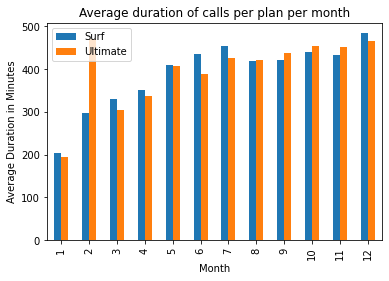

In [41]:
# Plot a bar plot to visualize the average duration of calls per plan per month
average_duration.unstack().plot(kind='bar')
plt.title('Average duration of calls per plan per month')
plt.ylabel('Average Duration in Minutes')
plt.xlabel('Month')
plt.legend(['Surf', 'Ultimate'])
plt.show()


Based on the barplot above visualizing the average duration of calls per plan per month, it appears that in general, average call duration is almost the same each month for users of both surf and ultimate plans with the exception of February in which the average for ultimate plan users is around 200 minutes higher than that of surf plan users.

In [42]:
# Compare the number of minutes users of each plan require each month
minutes_per_month = monthly_usage.groupby(['month', 'plan', 'user_id'])['duration'].sum().reset_index()
display(minutes_per_month.head())


,month,plan,user_id,duration
0,1,surf,1042,114.0
1,1,surf,1362,292.0
2,1,ultimate,1077,290.0
3,1,ultimate,1185,181.0
4,1,ultimate,1196,287.0


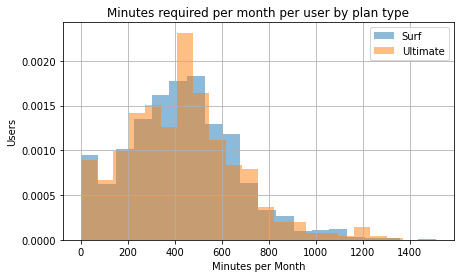

In [43]:
# Plot a histogram to visualize the number of minutes required per month per user by plan type
minutes_per_month[minutes_per_month.plan == 'surf']['duration'].hist(
    bins=20, figsize=(7, 4), alpha=.5, density=True
)
minutes_per_month[minutes_per_month.plan == 'ultimate']['duration'].hist(
    bins=20, figsize=(7, 4), alpha=.5, density=True
)
plt.title('Minutes required per month per user by plan type')
plt.ylabel('Users')
plt.xlabel('Minutes per Month')
plt.legend(['Surf', 'Ultimate'])
plt.show()


Based on the above histogram visualizing the number of minutes required per month per user by plan type, there is also a high degree of similarily between users of both plan types as the histograms seem to align almost exactly.

In [44]:
# Calculate the mean and the variance of the monthly call duration for surf versus ultimate plans
monthly_duration_mean_surf = monthly_usage[monthly_usage['plan'] == 'surf']['duration'].mean()
print(f'Monthly call duration mean for surf: {monthly_duration_mean_surf}')

monthly_duration_var_surf = monthly_usage[monthly_usage['plan'] == 'surf']['duration'].var()
print(f'Monthly call duration variance for surf: {monthly_duration_var_surf}')

monthly_duration_mean_ultimate = monthly_usage[monthly_usage['plan'] == 'ultimate']['duration'].mean()
print(f'Monthly call duration mean for ultimate: {monthly_duration_mean_ultimate}')

monthly_duration_var_ultimate = monthly_usage[monthly_usage['plan'] == 'ultimate']['duration'].var()
print(f'Monthly call duration variance for ultimate: {monthly_duration_var_ultimate}')


Monthly call duration mean for surf: 436.80246113989637
Monthly call duration variance for surf: 52481.561082726934
Monthly call duration mean for ultimate: 435.2865168539326
Monthly call duration variance for ultimate: 56387.08516253417


Looking at the above means and the variances of call duration for users of surf versus ultimate, again the means and variances are very similar which shows that the amount and the spread of the data reveal similar call behavior and usage between users in the two groups.

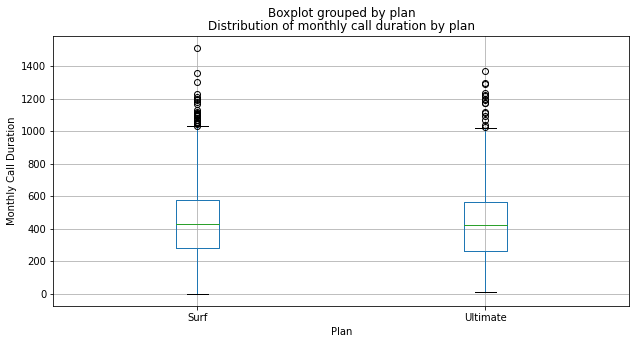

In [45]:
# Plot a boxplot to visualize the distribution of the monthly call duration
monthly_usage[['duration', 'plan']].boxplot(figsize=(10, 5), by='plan')

plt.title('Distribution of monthly call duration by plan')
plt.ylabel('Monthly Call Duration')
plt.xlabel('Plan')
plt.xticks([1, 2], ['Surf', 'Ultimate'])
plt.show()


Finally, the above boxplot showing the distribution of monthly call durations by plan per user reveals that the durations are extremely similar in spread with almost identical means and ranges.

All the data aligns to conclude that call behavior is extremely similar for both surf and ultimate plan users.

### Messages

In [46]:
# Compare average number of messages sent per each plan per each distinct month
average_messages = monthly_usage.groupby(['month', 'plan'])['messages'].mean()
display(average_messages.head())


month  plan    
1      surf        21.000000
       ultimate    20.666667
2      surf        21.600000
       ultimate    25.166667
3      surf        21.937500
Name: messages, dtype: float64

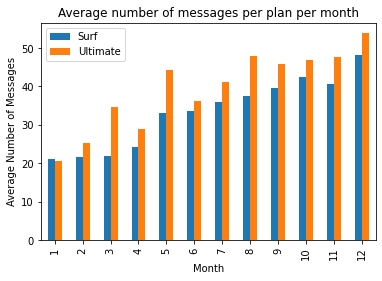

In [47]:
# Plot a bar plot to visualize the average number of messages per plan per month
average_messages.unstack().plot(kind='bar')
plt.title('Average number of messages per plan per month')
plt.ylabel('Average Number of Messages')
plt.xlabel('Month')
plt.legend(['Surf', 'Ultimate'])
plt.show()


Based on the barplot above visualizing the average number of messages per plan per month, it appears that in general, ultimate plan users send more messages on average per month consistently throughout the year with the exception of January in which the average was slightly lower than the average for surf users. 

In [48]:
# Compare the number of messages users of each plan tend to send each month
messages_per_month = monthly_usage.groupby(['month', 'plan', 'user_id'])['messages'].sum().reset_index()
display(messages_per_month.head())


,month,plan,user_id,messages
0,1,surf,1042,0.0
1,1,surf,1362,21.0
2,1,ultimate,1077,37.0
3,1,ultimate,1185,0.0
4,1,ultimate,1196,23.0


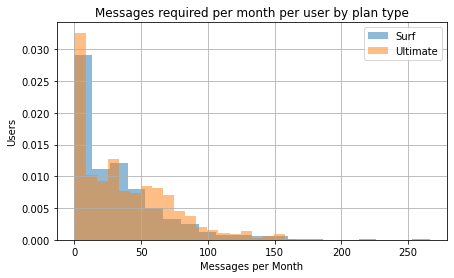

In [49]:
# Plot a histogram to visualize the number of messages required per month per user by plan type
messages_per_month[messages_per_month.plan == 'surf']['messages'].hist(
    bins=20, figsize=(7, 4), alpha=.5, density=True
)
messages_per_month[messages_per_month.plan == 'ultimate']['messages'].hist(
    bins=20, figsize=(7, 4), alpha=.5, density=True
)
plt.title('Messages required per month per user by plan type')
plt.ylabel('Users')
plt.xlabel('Messages per Month')
plt.legend(['Surf', 'Ultimate'])
plt.show()


Based on the above histogram visualizing the number of messages required per month per user by plan type, it appears that more surf users utilize 50 or fewer messages per month while more ultimate users go beyond 50 messages per month. However, there are a few surf plan users who are outliers, using 150+ messages per month. 

In [50]:
# Calculate the mean and the variance of the monthly messaging totals for surf versus ultimate plans
monthly_messages_mean_surf = monthly_usage[monthly_usage['plan'] == 'surf']['messages'].mean()
print(f'Monthly messages mean for surf: {monthly_messages_mean_surf}')

monthly_messages_var_surf = monthly_usage[monthly_usage['plan'] == 'surf']['messages'].var()
print(f'Monthly messages variance for surf: {monthly_messages_var_surf}')

monthly_messages_mean_ultimate = monthly_usage[monthly_usage['plan'] == 'ultimate']['messages'].mean()
print(f'Monthly messages mean for ultimate: {monthly_messages_mean_ultimate}')

monthly_messages_var_ultimate = monthly_usage[monthly_usage['plan'] == 'ultimate']['messages'].var()
print(f'Monthly messages variance for ultimate: {monthly_messages_var_ultimate}')


Monthly messages mean for surf: 40.10965630114566
Monthly messages variance for surf: 1091.3442310038054
Monthly messages mean for ultimate: 46.29623287671233
Monthly messages variance for ultimate: 1085.183107568317


Looking at the above means and the variances of messages sent for users of surf versus ultimate, the mean messages for ultimate users is higher than that of surf users with similar variance values for both plans.

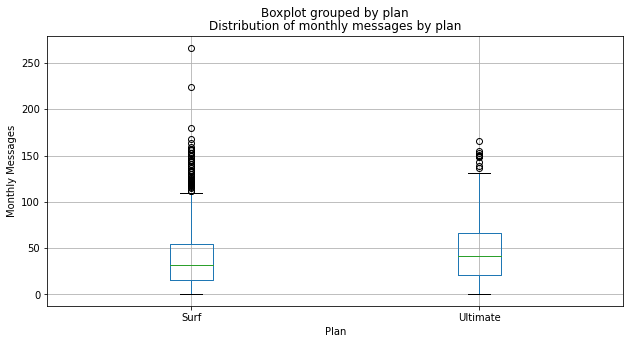

In [51]:
# Plot a boxplot to visualize the distribution of the monthly messages
monthly_usage[['messages', 'plan']].boxplot(figsize=(10, 5), by='plan')

plt.title('Distribution of monthly messages by plan')
plt.ylabel('Monthly Messages')
plt.xlabel('Plan')
plt.xticks([1, 2], ['Surf', 'Ultimate'])
plt.show()


Finally, the above boxplot showing the distribution of monthly messages sent by plan per user reveals that the number of messages sent are slightly higher among ultimate users versus surf users though there are a few very high outliers in the surf group.

Based on all this data, it appears that users of the ultimate plan tend to send more messages on average in comparison to users of the surf plan.

### Internet

In [52]:
# Compare average amount of data used per each plan per each distinct month
average_gb_used = monthly_usage.groupby(['month', 'plan'])['gb_used'].mean()
display(average_gb_used.head())


month  plan    
1      surf         5.000000
       ultimate     7.250000
2      surf        12.222222
       ultimate    17.285714
3      surf        13.565217
Name: gb_used, dtype: float64

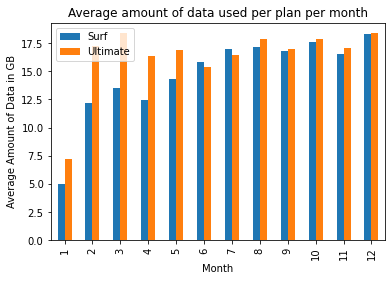

In [53]:
# Plot a bar plot to visualize the average amount of data used per plan per month
average_gb_used.unstack().plot(kind='bar')
plt.title('Average amount of data used per plan per month')
plt.ylabel('Average Amount of Data in GB')
plt.xlabel('Month')
plt.legend(['Surf', 'Ultimate'])
plt.show()


Based on the barplot above visualizing the average amount of data used per plan per month, it appears that in general, ultimate plan users tend to use more data on average per month consistently throughout the year with the exception of July in which the average was slightly lower than the average for surf users. The difference in data utilization is more stark from January to May but is much more similar in number for the rest of the year.

In [54]:
# Compare the amount of data users of each plan use each month
gb_per_month = monthly_usage.groupby(['month', 'plan', 'user_id'])['gb_used'].sum().reset_index()
display(gb_per_month.head())


,month,plan,user_id,gb_used
0,1,surf,1042,2.0
1,1,surf,1362,8.0
2,1,ultimate,1077,11.0
3,1,ultimate,1185,7.0
4,1,ultimate,1196,9.0


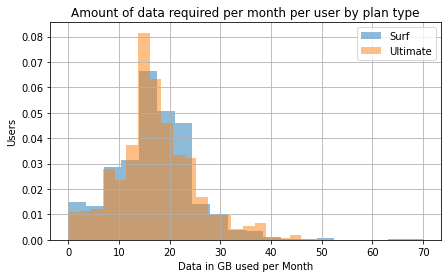

In [55]:
# Plot a histogram to visualize the amount of data required per month per user by plan type
gb_per_month[gb_per_month.plan == 'surf']['gb_used'].hist(
    bins=20, figsize=(7, 4), alpha=.5, density=True
)
gb_per_month[gb_per_month.plan == 'ultimate']['gb_used'].hist(
    bins=20, figsize=(7, 4), alpha=.5, density=True
)
plt.title('Amount of data required per month per user by plan type')
plt.ylabel('Users')
plt.xlabel('Data in GB used per Month')
plt.legend(['Surf', 'Ultimate'])
plt.show()


Based on the above histogram visualizing the amount of data required per month per user by plan type, although it appears as though the two distributions look relatively similar, more ultimate users tend to use higher amounts of data per month than surf users.

In [56]:
# Calculate the mean and the variance of the monthly data usage totals for surf versus ultimate plans
monthly_data_mean_surf = monthly_usage[monthly_usage['plan'] == 'surf']['gb_used'].mean()
print(f'Monthly data mean for surf: {monthly_data_mean_surf}')

monthly_data_var_surf = monthly_usage[monthly_usage['plan'] == 'surf']['gb_used'].var()
print(f'Monthly data variance for surf: {monthly_data_var_surf}')

monthly_data_mean_ultimate = monthly_usage[monthly_usage['plan'] == 'ultimate']['gb_used'].mean()
print(f'Monthly data mean for ultimate: {monthly_data_mean_ultimate}')

monthly_data_var_ultimate = monthly_usage[monthly_usage['plan'] == 'ultimate']['messages'].var()
print(f'Monthly data variance for ultimate: {monthly_data_var_ultimate}')


Monthly data mean for surf: 16.831193838254173
Monthly data variance for surf: 59.473734090854755
Monthly data mean for ultimate: 17.331015299026426
Monthly data variance for ultimate: 1085.183107568317


Looking at the above means and the variances of data used for users of surf versus ultimate, the mean messages for ultimate users is slightly higher than that of surf users. The variance, however is much higher for ultimate users than for surf users which indicates a larger spread of data for ultimate users.

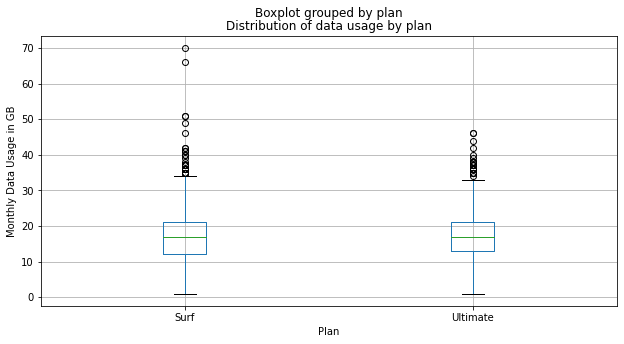

In [57]:
# Plot a boxplot to visualize the distribution of the monthly data usage
monthly_usage[['gb_used', 'plan']].boxplot(figsize=(10, 5), by='plan')

plt.title('Distribution of data usage by plan')
plt.ylabel('Monthly Data Usage in GB')
plt.xlabel('Plan')
plt.xticks([1, 2], ['Surf', 'Ultimate'])
plt.show()


Finally, the above boxplot showing the distribution of monthly data used by plan per user reveals that the distribution of usage is very similar.

Based on all this data, it appears that users of the ultimate plan tend to use slightly more data on average in comparison to users of the surf plan.

## Revenue

A similar analysis that was done above for calls, messages, and internet to determine user behavior will be performed on revenue below.

In [58]:
# Compare average revenue per each plan per each distinct month
average_revenue = monthly_usage.groupby(['month', 'plan'])['revenue'].mean()
display(average_revenue.head())


month  plan    
1      surf        20.000000
       ultimate    70.000000
2      surf        34.396667
       ultimate    70.000000
3      surf        45.941304
Name: revenue, dtype: float64

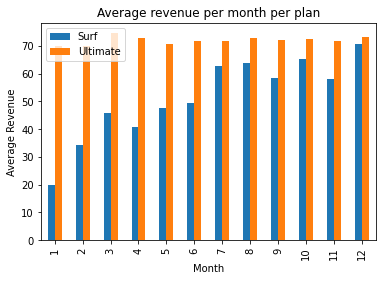

In [59]:
# Plot a bar plot to visualize the average amount of data used per plan per month
average_revenue.unstack().plot(kind='bar')
plt.title('Average revenue per month per plan')
plt.ylabel('Average Revenue')
plt.xlabel('Month')
plt.legend(['Surf', 'Ultimate'])
plt.show()


Based on the barplot above visualizing the average revenue per plan per month, it appears that across the board, ultimate plan users had higher revenue than surf plan users with larger differences towards the beinning of the year.

In [60]:
# Compare the amount of revenue users of each plan generated each month
revenue_per_month = monthly_usage.groupby(['month', 'plan', 'user_id'])['revenue'].sum().reset_index()
display(revenue_per_month.head())


,month,plan,user_id,revenue
0,1,surf,1042,20.0
1,1,surf,1362,20.0
2,1,ultimate,1077,70.0
3,1,ultimate,1185,70.0
4,1,ultimate,1196,70.0


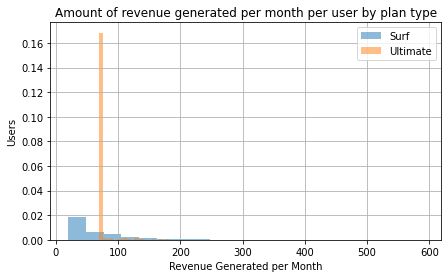

In [61]:
# Plot a histogram to visualize the amount of revenue per month per user by plan type
revenue_per_month[revenue_per_month.plan == 'surf']['revenue'].hist(
    bins=20, figsize=(7, 4), alpha=.5, density=True
)
revenue_per_month[revenue_per_month.plan == 'ultimate']['revenue'].hist(
    bins=20, figsize=(7, 4), alpha=.5, density=True
)
plt.title('Amount of revenue generated per month per user by plan type')
plt.ylabel('Users')
plt.xlabel('Revenue Generated per Month')
plt.legend(['Surf', 'Ultimate'])
plt.show()


Based on the above histogram visualizing the revenue generated per month per user by plan type, there is quite a stark difference between ultimate users and surf users. While surf users tend to have a much greater distribution of revenue values, most of the ultimate users are concentrated at around $70/month which is the baseline monthly charge for the plan. 

In [62]:
# Calculate the mean and the variance of the monthly revenue totals for surf versus ultimate plans
monthly_revenue_mean_surf = monthly_usage[monthly_usage['plan'] == 'surf']['revenue'].mean()
print(f'Monthly revenue mean for surf: {monthly_revenue_mean_surf}')

monthly_revenue_var_surf = monthly_usage[monthly_usage['plan'] == 'surf']['revenue'].var()
print(f'Monthly revenue variance for surf: {monthly_revenue_var_surf}')

monthly_revenue_mean_ultimate = monthly_usage[monthly_usage['plan'] == 'ultimate']['revenue'].mean()
print(f'Monthly revenue mean for ultimate: {monthly_revenue_mean_ultimate}')

monthly_revenue_var_ultimate = monthly_usage[monthly_usage['plan'] == 'ultimate']['revenue'].var()
print(f'Monthly revenue variance for ultimate: {monthly_revenue_var_ultimate}')


Monthly revenue mean for surf: 60.706408137317226
Monthly revenue variance for surf: 3067.835152293878
Monthly revenue mean for ultimate: 72.31388888888888
Monthly revenue variance for ultimate: 129.8484855509195


Looking at the above means and the variances of revenue for surf versus ultimate, the mean revenue is quite higher for ultimate than that of surf but the variance for surf is much higher than that of ultimate. This indicates a greater concentration of values around the mean for ultimate users than surf users.

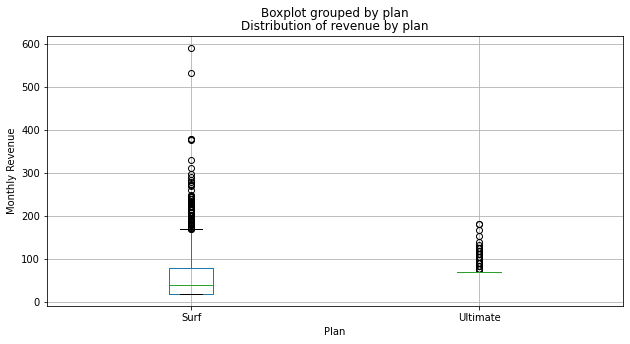

In [63]:
# Plot a boxplot to visualize the distribution of the monthly data usage
monthly_usage[['revenue', 'plan']].boxplot(figsize=(10, 5), by='plan')

plt.title('Distribution of revenue by plan')
plt.ylabel('Monthly Revenue')
plt.xlabel('Plan')
plt.xticks([1, 2], ['Surf', 'Ultimate'])
plt.show()


Finally, the above boxplot showing the distribution of monthly revenue by plan per user reveals that the distribution of usage is quite different. As observed in the prior visualizations and calculations, the revenue for surf users is much more distributed than the revenue for ultimate users and the average revenue is higher for ultimate users than surf users.

Based on all this data, it appears that users of the ultimate plan tend to have higher revenue than that users of the surf plan as most of the surf plan users tend to have monthly revenue values under the ultimate plan baseline monthly charge of $70/month while most ultimate users tend to have revenue values of exactly the baseline monthly charge, indicating that they tend not to exceed their monthly package limits.

## Test statistical hypotheses

**Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.**

Null Hypothesis: Average revenue from users of the Surf calling plan is equal to users of the Ultimate calling plan

Alternative Hypothesis: Average revenue from users of the Surf calling plan is not equal to users of the Ultimate calling plan

Statistical Test: 2-sided t-test

Alpha Value: 0.05

In [64]:
# Create an array for the average monthly revenue of Surf users
surf_monthly_avg = revenue_per_month[revenue_per_month['plan'] == 'surf']['revenue']
display(surf_monthly_avg.head())
surf_monthly_avg.count()


0    20.0
1    20.0
6    20.0
7    20.0
8    30.0
Name: revenue, dtype: float64

1573

In [65]:
# Create an array for the average monthly revenue of Ultimate users
ultimate_monthly_avg = revenue_per_month[revenue_per_month['plan'] == 'ultimate']['revenue']
display(ultimate_monthly_avg.head())
ultimate_monthly_avg.count()


2     70.0
3     70.0
4     70.0
5     70.0
15    70.0
Name: revenue, dtype: float64

720

In [66]:
# Test the hypothesis
alpha = 0.05

results = st.ttest_ind(surf_monthly_avg, ultimate_monthly_avg, equal_var = False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")


p-value:  3.1703905481136763e-15
We reject the null hypothesis


**Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.**

Null Hypothesis: Average revenue from users in the NY-NJ area is equal to users from other regions

Alternative Hypothesis: Average revenue from users in the NY-NJ area is not equal to users from other regions

Statistical Test: 2-sided t-test

Alpha Value: 0.05

In [67]:
# Add the 'city' column from the 'users' dataframe to the 'revenue_per_month' dataframe
revenue_per_month = pd.merge(revenue_per_month, users['city'], on = 'user_id', how='left')
display(revenue_per_month.head(10))


,month,plan,user_id,revenue,city
0,1,surf,1042,20.0,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA"
1,1,surf,1362,20.0,"Denver-Aurora-Lakewood, CO MSA"
2,1,ultimate,1077,70.0,"Charlotte-Concord-Gastonia, NC-SC MSA"
3,1,ultimate,1185,70.0,"Louisville/Jefferson County, KY-IN MSA"
4,1,ultimate,1196,70.0,"Los Angeles-Long Beach-Anaheim, CA MSA"
5,1,ultimate,1214,70.0,"San Francisco-Oakland-Berkeley, CA MSA"
6,2,surf,1042,20.0,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA"
7,2,surf,1099,20.0,"New York-Newark-Jersey City, NY-NJ-PA MSA"
8,2,surf,1138,30.0,"Riverside-San Bernardino-Ontario, CA MSA"
9,2,surf,1171,30.0,"Boston-Cambridge-Newton, MA-NH MSA"


In [68]:
# Create an array for the average monthly revenue of users from the NY-NJ area
nynj_monthly_avg = revenue_per_month[revenue_per_month['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']['revenue']
display(nynj_monthly_avg.head())
nynj_monthly_avg.count()


7     20.00
14    70.00
25    86.84
29    20.00
34    20.00
Name: revenue, dtype: float64

377

In [69]:
# Create an array for the average monthly revenue of users not from the NY-NJ area
othercities_monthly_avg = revenue_per_month[revenue_per_month['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']['revenue']
display(othercities_monthly_avg.head())
othercities_monthly_avg.count()


0    20.0
1    20.0
2    70.0
3    70.0
4    70.0
Name: revenue, dtype: float64

1916

In [70]:
# Test the hypothesis
alpha = 0.05

results = st.ttest_ind(nynj_monthly_avg, othercities_monthly_avg, equal_var = False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")
    

p-value:  0.03352561588530083
We reject the null hypothesis


## General conclusion

The following are the overarching conclusions that can be made about the data based on the above analyses:

**Calls**

-Call behavior is extremely similar for both surf and ultimate plan users.

**Messages:**

-Users of the ultimate plan tend to send more messages on average in comparison to users of the surf plan.

**Internet:**

-Users of the ultimate plan tend to use slightly more data on average in comparison to users of the surf plan.

**Revenue:**

-Users of the ultimate plan tend to have higher revenue than that users of the surf plan

-The results of the 2-sided t-test indicate that the higher revenue detected among ultimate plan users in comparison to surf plan users is statistically significant

-The results of the 2-sided t-test indicate that the lower revenue detected among users in the NY-NJ area compared to users in other regions is statistically significant

**Recommendation for Megaline**

Based on the results above, the commercial department of Megaline should focus their advertisement budget on promoting the Ultimate Plan which brings in more revenue on average than the Surf Plan. It should also concentrate their efforts on bringing revenue up in the NY-NJ area as it generates less revenue than other regions.